In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ursse.phase_space_trajectory as pst
import ursse_cpp.sync_motion_sim as sm
from config_ursse import get_from_config
iota_period_sec = get_from_config("IOTA_revolution_period")
df0 = pst.get_revolution_delay_df_one_gate('shift_02_28_2020', '1el_002.ptu')
T0 = pst.get_initial_sync_period_estimate(df0)

In [18]:
gamma = 100/0.511
rho=70
hbar_c = 0.1973269804e-4
gamma_to_nav = 0.0661969
Ec = 3 / 2 * hbar_c * pow(gamma, 3) / rho
nav = gamma_to_nav*gamma

# Energy per turn distribution

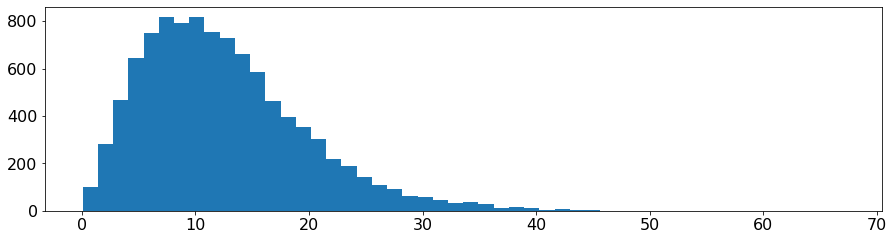

In [27]:
nrev = 10000
nphs = np.random.poisson(lam=nav, size=nrev)
ens = np.zeros(nrev)
for i,nph in enumerate(nphs):
    ens[i] = sum([sm.InvSynchFractInt(r) for r in np.random.rand(nph)])*Ec
plt.hist(ens, bins=50)
plt.show()

In [28]:
np.mean(ens)

12.520005161940944

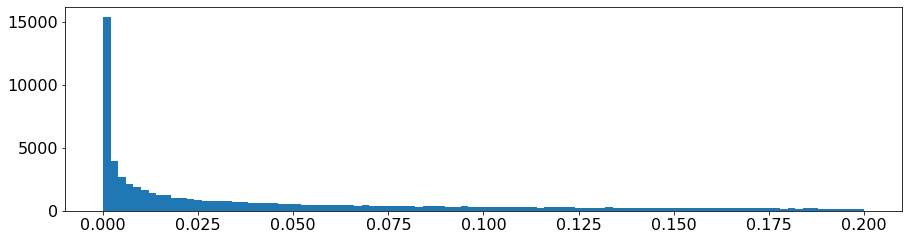

In [3]:
rands = np.random.rand(100000)
en = np.zeros(shape=rands.shape)
for i,r in enumerate(rands):
    en[i] = sm.InvSynchFractInt(r)
plt.hist(en, bins=100, range=(0,0.2))
plt.show()

In [4]:
Scale*np.mean(en)

12.691160885823564

In [5]:
Scale*np.std(en)

22.966760184080314

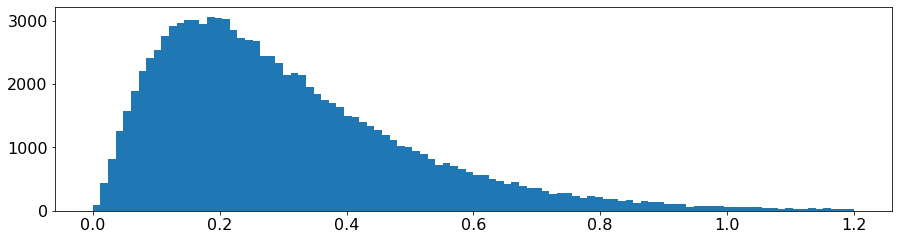

In [6]:
rands = np.random.rand(100000,8)
en = np.zeros(shape=rands.shape[0])
for i,r in enumerate(rands):
    en[i] = 1/360*(
        30*sm.InvSynchFractInt(r[0])
        +30*sm.InvSynchFractInt(r[1])
        +30*sm.InvSynchFractInt(r[2])
        +30*sm.InvSynchFractInt(r[3])
        +60*sm.InvSynchFractInt(r[4])
        +60*sm.InvSynchFractInt(r[5])
        +60*sm.InvSynchFractInt(r[6])
        +60*sm.InvSynchFractInt(r[7])
    )
plt.hist(en, bins=100, range=(0,1.2))
plt.show()

In [7]:
Scale*np.mean(en)

12.692401671574004

In [8]:
(2.5e-3/200)**2

1.5625e-10

In [9]:
from scipy.special import kv

In [10]:
kv(5/3,1)

1.097730716247146

In [11]:
spad_tts = 0.35

In [12]:
phase_df = pst.get_phase_df_from_revoluton_delay_df(df0, T0)
sz_df = pst.get_sz_df(df0, spad_tts_ns=spad_tts)
polar_df = pst.get_polar_df(phase_df, sz_df)

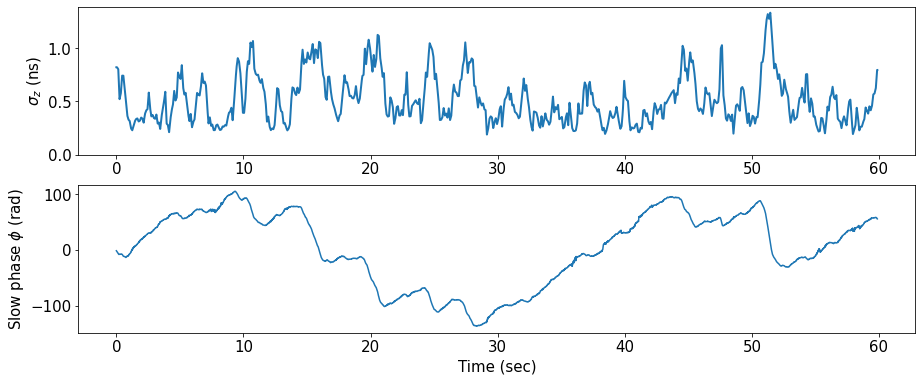

In [13]:
pst.plot_polar_df_cartesian(polar_df)

In [4]:
gamma = 100/0.511
alpha = 0.07088
V = 380
f = 30e6

In [15]:
%%time
sim_df = sm.get_simulated_revolution_delay_data(gamma, alpha, V, f,
                            df0['revolution'],
                            tau0=0, delta0=0, rand_seed_int=1)

CPU times: user 35min 14s, sys: 6.03 s, total: 35min 20s
Wall time: 35min 2s


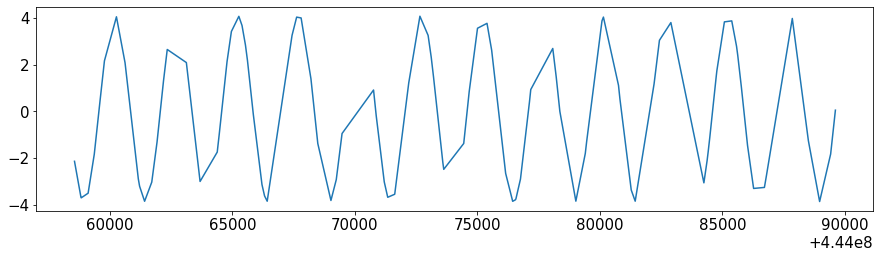

In [16]:
n1 = 1460000
dn = 100
plt.plot(sim_df.loc[n1:n1+dn,'revolution'], sim_df.loc[n1:n1+dn,'delay'])

In [17]:
sim_sz_df = pst.get_sz_df(sim_df, spad_tts_ns=0)

Text(0.5, 0, 'Time (sec)')

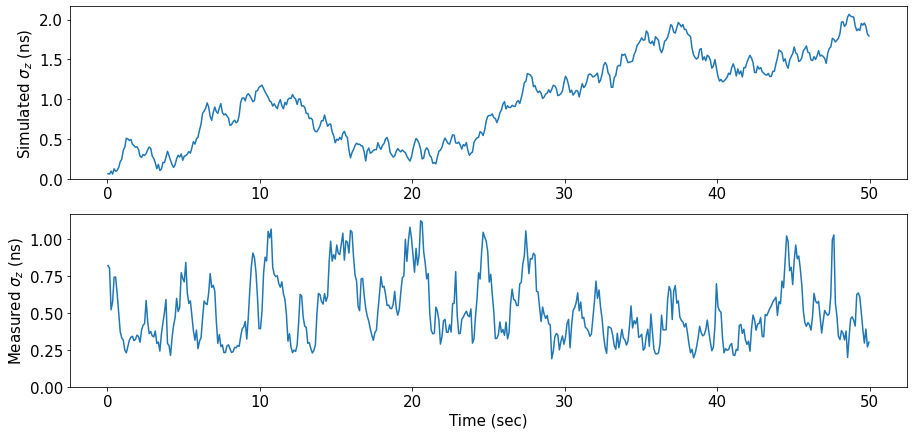

In [18]:
tmax = 50
sim_sz_df_plt = sim_sz_df[sim_sz_df['time_sec']<tmax]
sz_df_plt = sz_df[sz_df['time_sec']<tmax]
fig, ax = plt.subplots(2, figsize=(15,7))
ax[0].plot(sim_sz_df_plt['time_sec'], sim_sz_df_plt['sz_ns'])
ax[0].set_ylim(0,ax[0].get_ylim()[1])
ax[0].set_ylabel("Simulated $\sigma_z$ (ns)")
ax[1].plot(sz_df_plt['time_sec'], sz_df_plt['sz_ns'])
ax[1].set_ylim(0,ax[1].get_ylim()[1])
ax[1].set_ylabel("Measured $\sigma_z$ (ns)")
ax[1].set_xlabel("Time (sec)")

In [19]:
sim_sz_df_plt['sz_ns'].mean()

0.9915631405568294

In [20]:
sz_df_plt['sz_ns'].mean()

0.5117424674994921

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
sim_df[sim_df['time_sec']==0.05]['delay'].std()

0.19974558722049263

In [11]:
sim_sz_df_plt['sz_ns'].std()

0.9121306127627308

In [59]:
5.855*8.725e-5

0.0005108487500000001

# Textbook results for  rms of $\tau$

In [3]:
c = 2.9979e10
gamma = 100/0.511
hbar_c = 0.1973269804e-4
rho = 70
Ec = 3/2*hbar_c*gamma**3/rho
Et = 88.9e-7*(gamma*0.511)**4/rho
Scale = 15*np.sqrt(3)/8*Et
alpha = 0.07086
V = 380
E0 = gamma*511000
f = 30e6
h = 4
v0 = V/E0
S = Scale/E0
eta = alpha - 1/gamma**2
w = 2*np.pi*h*eta

In [4]:
ts = 0.836
JE = 2*E0*iota_period_sec/ts/Et
delta_rms = 0.62e-6*gamma/np.sqrt(JE*rho/100)
print("delta rms = ", delta_rms)
tau_rms = 1e9*delta_rms/(f*2*np.pi*np.sqrt(V/(2*np.pi*E0*h*np.abs(eta))))
print("tau_rms = ", tau_rms, "ns")

delta rms =  9.161908501615382e-05
tau_rms =  0.33273217708464514 ns


In [5]:
tau_rms*1e-9*c

9.974977936820578

In [14]:
res = sm.get_trajectory(gamma,alpha,V,f,2000000,0,0,3)
# import plotly.graph_objects as go


# fig = go.Figure()

# fig.add_trace(go.Scatter(x=res.index, y=res.delay,
#                     mode='lines',
#                     name='lines'))

# fig.show()

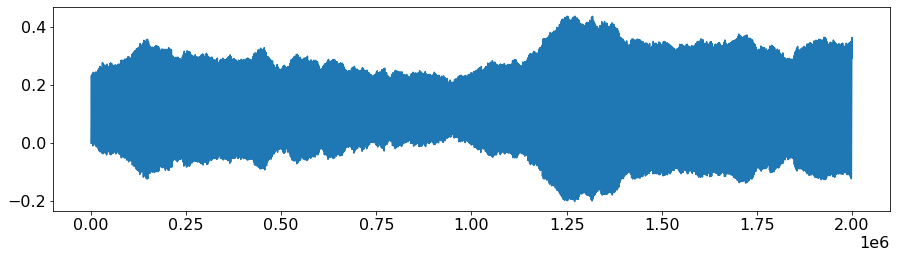

In [15]:
plt.plot(res.index, res.delay)

In [16]:
res.delay.std()

0.1392598249417138